## House Prices Prediction using Regression 

In [170]:
# Installing libraries for analysis
%cd /Users/shimonyagrawal/Desktop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

/Users/shimonyagrawal/Desktop


## Exploratory Data Analysis

In [171]:
# Loading the train and test dataset
df_train = pd.read_csv('/Users/shimonyagrawal/Desktop/House Prices Prediction using Regression/train.csv')
# print(df_train.columns)

df_test = pd.read_csv('/Users/shimonyagrawal/Desktop/House Prices Prediction using Regression/test.csv')
# print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [172]:
# Check different columns between train and test columns
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [173]:
# Drop column ID 

df_train.drop(columns = 'Id', inplace=True)
df_test.drop(columns = 'Id', inplace=True)

print('Drop column Id completed')

Drop column Id completed


In [175]:
def plot_missing(df):
    miss_col = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
    percent_miss = round((miss_col / len(df) *100), 2)
    missing = pd.DataFrame([miss_col, percent_miss]).T.rename(columns = {0:'Feature', 1:'% missing'})
    return missing

plot_missing(df_train)

,Feature,% missing
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageYrBlt,81.0,5.55
GarageType,81.0,5.55
GarageFinish,81.0,5.55
GarageQual,81.0,5.55


In [176]:
plot_missing(df_test)

,Feature,% missing
PoolQC,1456.0,99.79
MiscFeature,1408.0,96.50
Alley,1352.0,92.67
Fence,1169.0,80.12
FireplaceQu,730.0,50.03
LotFrontage,227.0,15.56
GarageYrBlt,78.0,5.35
GarageCond,78.0,5.35
GarageQual,78.0,5.35
GarageFinish,78.0,5.35


For some feature such as PoolQC, MiscFeature and Alley there are moer than 90% of missing value but in this case NaN mean No Pool, No Miscellaneous and No alley access.We will replace NaN with 'None' and for the other features we would take into account and impute NaN to the following column.

For other features such as BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath all of these are numerical features if No basement that should be replaced with 0. Likewise if No Garage GarageYrBlt, GarageArea, GarageCars should be replaced with 0 also.

In [177]:
none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
             'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

# Impute missing value
for col in none_cols:
    df_train[col].replace(np.nan, 'None', inplace=True)
    df_test[col].replace(np.nan, 'None', inplace=True)

In [178]:
bsm = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','BsmtQual']
df_train[bsm].groupby('BsmtQual').sum()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
BsmtQual,,,,,,
Ex,103495,2851,92772,199118,82,6
Fa,4575,276,20805,25656,6,2
Gd,292006,21417,385578,699001,294,27
None,0,0,0,0,0,0
TA,247638,43418,329016,620072,239,49


In [179]:
gar = ['GarageYrBlt', 'GarageArea', 'GarageCars','GarageQual']
df_train[gar].groupby('GarageQual').sum()

,GarageYrBlt,GarageArea,GarageCars
GarageQual,,,
Ex,5967.0,2064,5
Fa,92817.0,14946,65
Gd,27733.0,7800,26
None,0.0,0,0
Po,5756.0,978,3
TA,2596087.0,664763,2481


In [180]:
# Replace these features by 0 
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

for col in zero_cols:
    df_train[col].replace(np.nan, 0, inplace=True)
    df_test[col].replace(np.nan, 0, inplace=True)

### Bivariate Analysis 

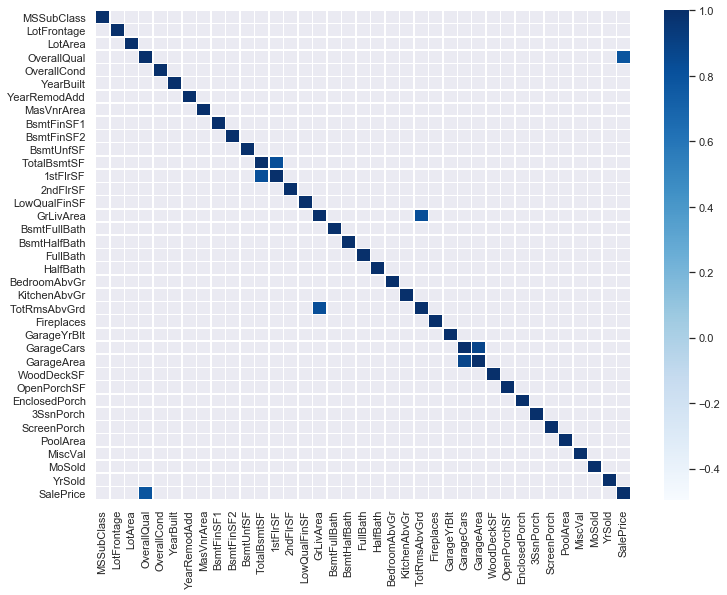

In [181]:
plt.subplots(figsize=(12,9))

corrmat = df_train.corr()
sns.heatmap(corrmat, mask = corrmat < 0.75, linewidth = 0.5, cmap = 'Blues');

In [182]:
# Finding the highest correlated variables for further analysis 

top_correlated = abs(corrmat.SalePrice).sort_values(ascending=False).head(10)
top_correlated_col = list(top_correlated.index)
top_correlated_col.remove('SalePrice')
top_correlated

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### Data Preprocessing 

We can visualise the data to identify outliers and remove the problematic ones that could distort further statistical analysis. 

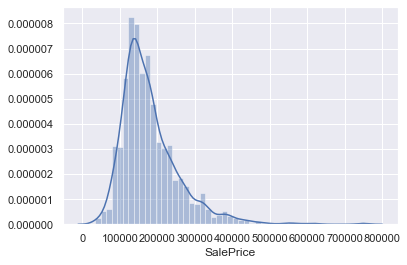

In [183]:
df_train['SalePrice'].describe()
sns.distplot(df_train['SalePrice']);

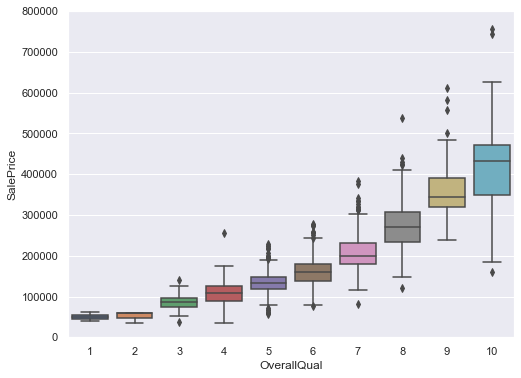

In [184]:
# Figure: Boxplot for overall material and finish quality and sale price
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [185]:
df_train = df_train.drop(df_train[(df_train['OverallQual'] < 5) & (df_train['SalePrice'] > 200000)].index)
df_train = df_train.drop(df_train[(df_train['OverallQual'] > 10) & (df_train['SalePrice'] < 400000)].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


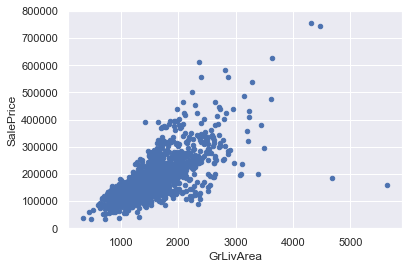

In [186]:
# Figure: Scatter plot for above ground living area square feet and sale price 
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [187]:
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 400000)].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


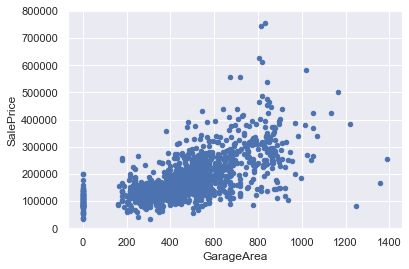

In [188]:
# Figure: Scatter plot for garage area and sale price 
var = 'GarageArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [189]:
df_train = df_train.drop(df_train[(df_train['GarageArea'] > 1200) & (df_train['SalePrice'] < 400000)].index)

### Univariate Analysis

Skewness: 1.892190
Kurtosis: 6.603841


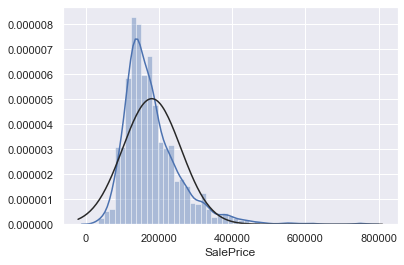

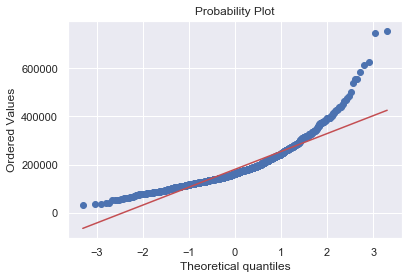

In [190]:
#histogram and normal probability plot

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

#skewness and kurtosis
# measure of lack of symmetry in data - here there is a positve skewness
print("Skewness: %f" % df_train['SalePrice'].skew())
# tailedness of frequency; actually measures the outliers in the data - here, it is a leptokurtic distribution
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

As seen from the figures above, the variable Sale Price has a positive skewness and a leptokurtic distribution which indicates high peakedness. It can be resolved by log transformation which can make the data less skewed. 

Skewness: 0.123700
Kurtosis: 0.822109


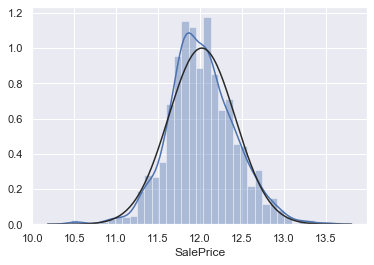

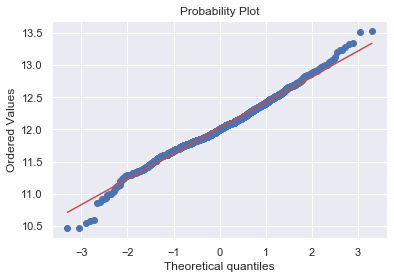

In [191]:
# Sale Price has positive skewness, so we need to transform data by Log-transformation of the target variable.

df_train['SalePrice'] = np.log(df_train['SalePrice'])

#transformed histogram and normal probability plot

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

### Feature Engineering 

In [192]:
# Creating a new variable Total Square Feet

df_train['TotalSF'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

df_test['TotalSF'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [193]:
# df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [194]:
# df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [331]:
drop_col = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
             'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope','Neighborhood', 
             'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallCond','YearRemodAdd', 
             'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
             'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 
             'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
             'Heating', 'HeatingQC','CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'BsmtFullBath', 'BsmtHalfBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr', 
             'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 
             'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond','PavedDrive', 
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 
             'Fence', 'MiscFeature', 'MiscVal','MoSold', 'YrSold']

df_train = df_train[df_train.columns.difference(drop_col)]
df_test = df_test[df_test.columns.difference(drop_col)]

print('Drop Columns Completed')

Drop Columns Completed


## Modelling and Prediction
### Splitting the dataset into training and testing data

In [236]:
df_train_dummies = pd.get_dummies(df_train, drop_first = True, columns = ['SaleCondition']) 
df_train_dummies.columns

Index(['GarageArea', 'GrLivArea', 'OverallQual', 'SalePrice', 'SaleType',
       'TotalSF', 'YearBuilt', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [321]:
# df_train_dummies.info()

In [241]:
float_col = df_train_dummies.select_dtypes(include=['float64']) # This will select float columns only
# list(float_col.columns.values)

for col in float_col.columns.values:
    df_train_dummies[col] = df_train_dummies[col].astype('int64')

print(df_train_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GarageArea             1453 non-null   int64 
 1   GrLivArea              1453 non-null   int64 
 2   OverallQual            1453 non-null   int64 
 3   SalePrice              1453 non-null   int64 
 4   SaleType               1453 non-null   object
 5   TotalSF                1453 non-null   int64 
 6   YearBuilt              1453 non-null   int64 
 7   SaleCondition_AdjLand  1453 non-null   uint8 
 8   SaleCondition_Alloca   1453 non-null   uint8 
 9   SaleCondition_Family   1453 non-null   uint8 
 10  SaleCondition_Normal   1453 non-null   uint8 
 11  SaleCondition_Partial  1453 non-null   uint8 
dtypes: int64(6), object(1), uint8(5)
memory usage: 97.9+ KB
None


In [249]:
X = df_train_dummies[['GarageArea', 'GrLivArea', 'OverallQual', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal','SaleCondition_Partial', 'TotalSF', 'YearBuilt']]

y = df_train_dummies['SalePrice']

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

In [302]:
# Looking at the shape of the data to test whether training features number of columns match testing feature number of columns.The number of rows to match for the respective training and testing features and the labels

print('X_Train Shape:', X_train.shape)
print('Y_Train Shape:', y_train.shape)
print('X_Test Shape:', X_test.shape)
print('Y_Test Shape:', y_test.shape)

X_Train Shape: (1017, 10)
Y_Train Shape: (1017,)
X_Test Shape: (436, 10)
Y_Test Shape: (436,)


## Simple Linear Regression 

In [366]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn import metrics

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [367]:
coefficient = pd.DataFrame(linear_model.coef_, X_train.columns, columns = ['Coefficient'])
coefficient

,Coefficient
GarageArea,0.000098
GrLivArea,0.000322
OverallQual,0.108783
SaleCondition_AdjLand,0.048354
SaleCondition_Alloca,-0.045575
SaleCondition_Family,-0.128103
SaleCondition_Normal,0.096601
SaleCondition_Partial,0.164352
TotalSF,0.000077
YearBuilt,0.005193


In [369]:
pred_train = linear_model.predict(X_train)
# pred_train
pred_test = linear_model.predict(X_test)
# pred_test

Prediction = pd.DataFrame(pred_test)
Prediction.columns = ['Predicted Value']
Prediction

,Predicted Value
0,10.644484
1,11.840121
2,10.743492
3,11.212310
4,11.229189
...,...
431,11.359358
432,11.279523
433,12.089005
434,12.002005


In [370]:
meansqerror_train = metrics.mean_squared_error(y_train, pred_train)
print('Mean Squared Error of Training data for Linear Regression Model: ', meansqerror_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print('Root Mean Squared Error of Training for data Linear Regression Model: ', rmse_train)

meansqerror_test = metrics.mean_squared_error(y_test, pred_test)
print('Mean Squared Error of Testing data for Linear Regression Model: ', meansqerror_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error of Testing data for Linear Regression Model: ', rmse_test)

Mean Squared Error of Training data for Linear Regression Model:  0.10212261882025268
Root Mean Squared Error of Training for data Linear Regression Model:  0.31956629800442454
Mean Squared Error of Testing data for Linear Regression Model:  0.1033573633857832
Root Mean Squared Error of Testing data for Linear Regression Model:  0.3214924001991077


In [371]:
# Calculating the accuracy of our model 

print("Training accuracy of Logistic Regression model:", linear_model.score(X_train, y_train))
print("Testing accuracy of Logistic Regression model:", linear_model.score(X_test, y_test))

Training accuracy of Logistic Regression model: 0.6470035582377622
Testing accuracy of Logistic Regression model: 0.6275647549960413


## Logistic Regression 

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

logistic_model = LogisticRegression()
rfe = RFE(logistic_model, 9)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)  #Indicates all variables have been selected by RFE with a ranking of 1 
print(rfe.ranking_)

[ True  True  True False  True  True  True  True  True  True]
[1 1 1 2 1 1 1 1 1 1]


In [316]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [328]:
pred_train = logistic_model.predict(X_train)
# pred_train
pred_test = logistic_model.predict(X_test)
# pred_test

Prediction_logistic = pd.DataFrame(pred_test)
Prediction_logistic.columns = ['Predicted Value']
Prediction_logistic

,Predicted Value
0,11
1,12
2,11
3,11
4,11
...,...
431,11
432,11
433,12
434,12


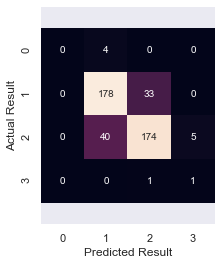

In [327]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, prediction)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show() 

In [330]:
meansqerror_train = metrics.mean_squared_error(y_train, pred_train)
print('Mean Squared Error of Training data for Logistic Regression Model: ', meansqerror_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print('Root Mean Squared Error of Training for data Logistic Regression Model: ', rmse_train)

meansqerror_test = metrics.mean_squared_error(y_test, pred_test)
print('Mean Squared Error of Testing data for Logistic Regression Model: ', meansqerror_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error of Testing data for Logistic Regression Model: ', rmse_test)

Mean Squared Error of Training data for Logistic Regression Model:  0.19960668633235004
Root Mean Squared Error of Training for data Logistic Regression Model:  0.44677364104471295
Mean Squared Error of Testing data for Logistic Regression Model:  0.19036697247706422
Root Mean Squared Error of Testing data for Logistic Regression Model:  0.43631063759329114


In [333]:
# Calculating the accuracy of our model 

print("Training accuracy of Logistic Regression model:", logistic_model.score(X_train, y_train))
print("Testing accuracy of Logistic Regression model:", logistic_model.score(X_test, y_test))

Training accuracy of Logistic Regression model: 0.80039331366765
Testing accuracy of Logistic Regression model: 0.8096330275229358


## Lasso Regression

In [352]:
from sklearn import linear_model

lasso_model = linear_model.Lasso(alpha = 25, max_iter = 100, tol = 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=25, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [354]:
pred_train = lasso_model.predict(X_train)
# pred_train
pred_test = lasso_model.predict(X_test)
# pred_test

Prediction_lasso = pd.DataFrame(pred_test)
Prediction_lasso.columns = ['Predicted Value']
Prediction_lasso

,Predicted Value
0,10.952430
1,11.447634
2,10.981250
3,11.328890
4,11.359592
...,...
431,11.531111
432,11.311240
433,11.636441
434,11.511862


In [357]:
meansqerror_train = metrics.mean_squared_error(y_train, pred_train)
print('Mean Squared Error of Training data for Lasso Regression Model: ', meansqerror_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print('Root Mean Squared Error of Training for data Lasso Regression Model: ', rmse_train)

meansqerror_test = metrics.mean_squared_error(y_test, pred_test)
print('Mean Squared Error of Testing data for Lasso Regression Model: ', meansqerror_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error of Testing data for Lasso Regression Model: ', rmse_test)

Mean Squared Error of Training data for Lasso Regression Model:  0.16666144253048681
Root Mean Squared Error of Training for data Lasso Regression Model:  0.4082418921797306
Mean Squared Error of Testing data for Lasso Regression Model:  0.1525211273717831
Root Mean Squared Error of Testing data for Lasso Regression Model:  0.39053953368613414


In [364]:
# Calculating the accuracy of our model 

print("Training accuracy of Lasso Regression model:", lasso_model.score(X_train, y_train))
print("Testing accuracy of Lasso Regression model:", lasso_model.score(X_test, y_test))

Training accuracy of Lasso Regression model: 0.4239190409347754
Testing accuracy of Lasso Regression model: 0.4504093217919347


## Ridge Regression

In [358]:
from sklearn.linear_model import Ridge 

ridge_model = Ridge(alpha = 25, max_iter = 100, tol = 0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.1)

In [362]:
pred_train = ridge_model.predict(X_train)
# pred_train
pred_test = ridge_model.predict(X_test)
# pred_test

Prediction_ridge = pd.DataFrame(pred_test)
Prediction_ridge.columns = ['Predicted Value']
Prediction_ridge

,Predicted Value
0,10.668487
1,11.811649
2,10.734027
3,11.209538
4,11.226408
...,...
431,11.350600
432,11.310900
433,12.062172
434,11.974313


In [363]:
meansqerror_train = metrics.mean_squared_error(y_train, pred_train)
print('Mean Squared Error of Training data for Ridge Regression Model: ', meansqerror_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print('Root Mean Squared Error of Training for data Ridge Regression Model: ', rmse_train)

meansqerror_test = metrics.mean_squared_error(y_test, pred_test)
print('Mean Squared Error of Testing data for Ridge Regression Model: ', meansqerror_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error of Testing data for Ridge Regression Model: ', rmse_test)

Mean Squared Error of Training data for Ridge Regression Model:  0.10245627327509264
Root Mean Squared Error of Training for data Ridge Regression Model:  0.32008791491571914
Mean Squared Error of Testing data for Ridge Regression Model:  0.10221295356991246
Root Mean Squared Error of Testing data for Ridge Regression Model:  0.31970760636855744


In [374]:
# Calculating the accuracy of our model 

print("Training accuracy of Ridge Regression model:", ridge_model.score(X_train, y_train))
print("Testing accuracy of Ridge Regression model:", ridge_model.score(X_test, y_test))

Training accuracy of Ridge Regression model: 0.6458502502174898
Testing accuracy of Ridge Regression model: 0.6316884916723329


While the Logistic Regression model gave the highest accuracy, the Ridge Regression model gave the lowest mean squared error. It was interesting to note that while the accuracy ranged from 40-60%; logistic regression gave an overall higher accuracy of 80%. Based on this finding, I believe Ridge Regression would be the optimal choice with the lowest mean squared error of 10% and accuracy of 64%. 